In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets 

In [3]:
iris =datasets.load_iris()

In [4]:
iris_data =pd.DataFrame(iris.data)

In [6]:
iris_data.columns  = iris.feature_names 

In [7]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# these data wil do 1st featurescaling it like standardScaling in USAlgo  then 4col data we make 2col by using PCA 

In [9]:
from sklearn.preprocessing import StandardScaler 

scaler =StandardScaler()

In [10]:
X_scaled = scaler.fit_transform(iris_data)

In [14]:
X_scaled[ :5, :]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [15]:
X_scaled.shape

(150, 4)

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca =PCA(n_components=2)

In [22]:
pca_scaled = pca.fit_transform(X_scaled)

In [24]:
pca_scaled[:5 , :]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

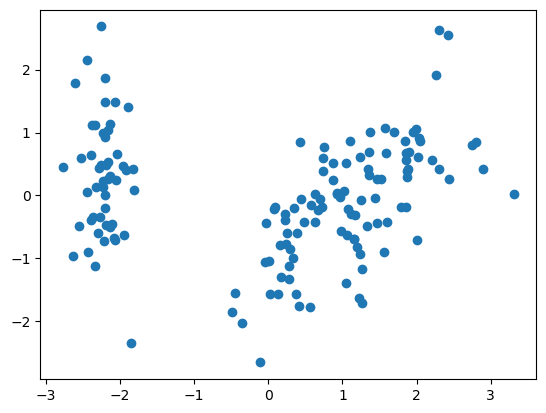

In [25]:
plt.scatter( pca_scaled[ : ,0]  , pca_scaled[ :,1])

## Hierarichal_Clustering 

### Agglomerative Clustering 

In [26]:
# Note : in Hc u should construct the dendograme to know ur K value 

# for that we use scipy Liabrary 

In [28]:
import scipy.cluster.hierarchy as sc

Text(0, 0.5, ' Eucledian Distances ')

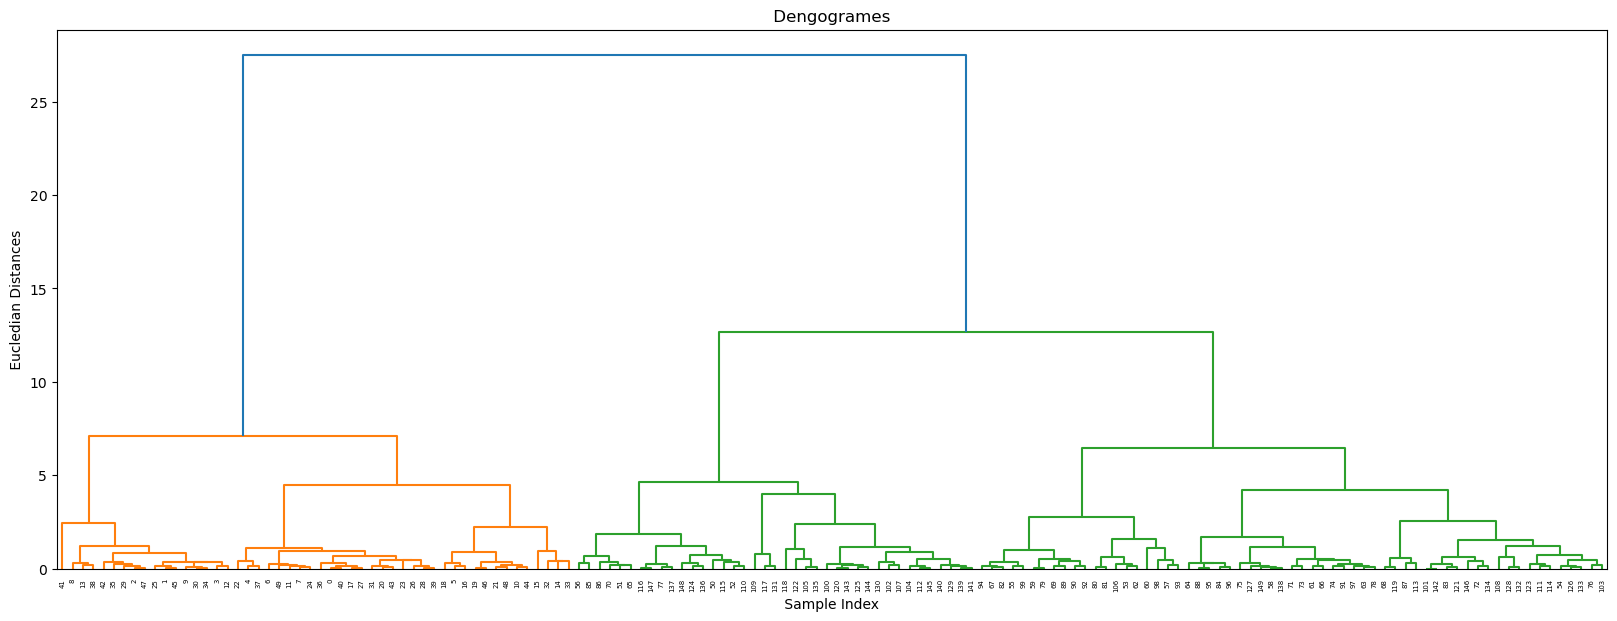

In [29]:
plt.figure(figsize=(20,7)) 

plt.title(" Dengogrames ") 

# crete dendograme 

sc.dendrogram(sc.linkage(pca_scaled , method="ward"))   # <-- thes is fix lien to crete dendograme 
plt.xlabel(" Sample Index ") 
plt.ylabel(" Eucledian Distances ")

In [33]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")

cluster.fit(pca_scaled)


c:\Users\Jayraj\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [34]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

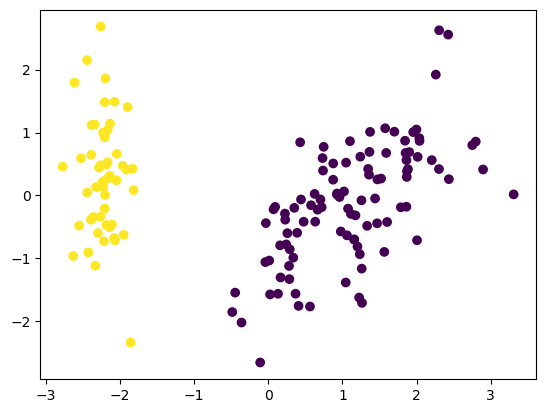

In [35]:
plt.scatter( pca_scaled[ : ,0]  , pca_scaled[ :,1]  , c=cluster.labels_)

In [36]:
from sklearn.metrics import silhouette_score    # we will check for every K val 

In [38]:
silhouette_coefficents = [ ] 

for k in range(2,11):
   
    Agglo =AgglomerativeClustering(n_clusters=k , affinity="euclidean" , linkage="ward")  
    
    Agglo.fit(X_scaled) 
    
    score =silhouette_score(X_scaled , Agglo.labels_)
    
    silhouette_coefficents.append(score)
    

c:\Users\Jayraj\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\Jayraj\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\Jayraj\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\Jayraj\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\Jayraj\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

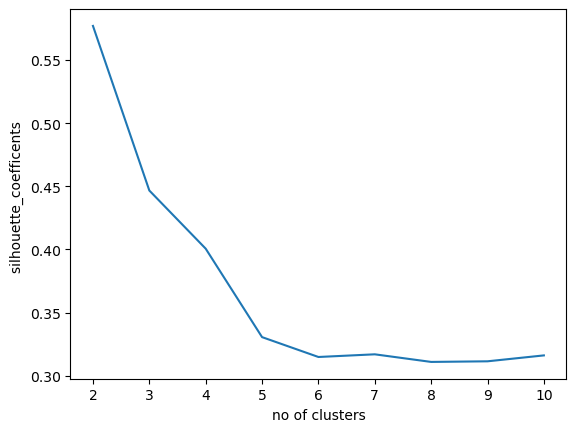

In [39]:
# Elbow curve 

plt.plot(range(2,11) , silhouette_coefficents) 
plt.xticks(range(2,11)) 

plt.xlabel("no of clusters")
plt.ylabel("silhouette_coefficents ") 

plt.show()  # K= 2 is higest 